In [1]:
import numpy as np
import sklearn 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from latexify import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=100, noise=0.1)

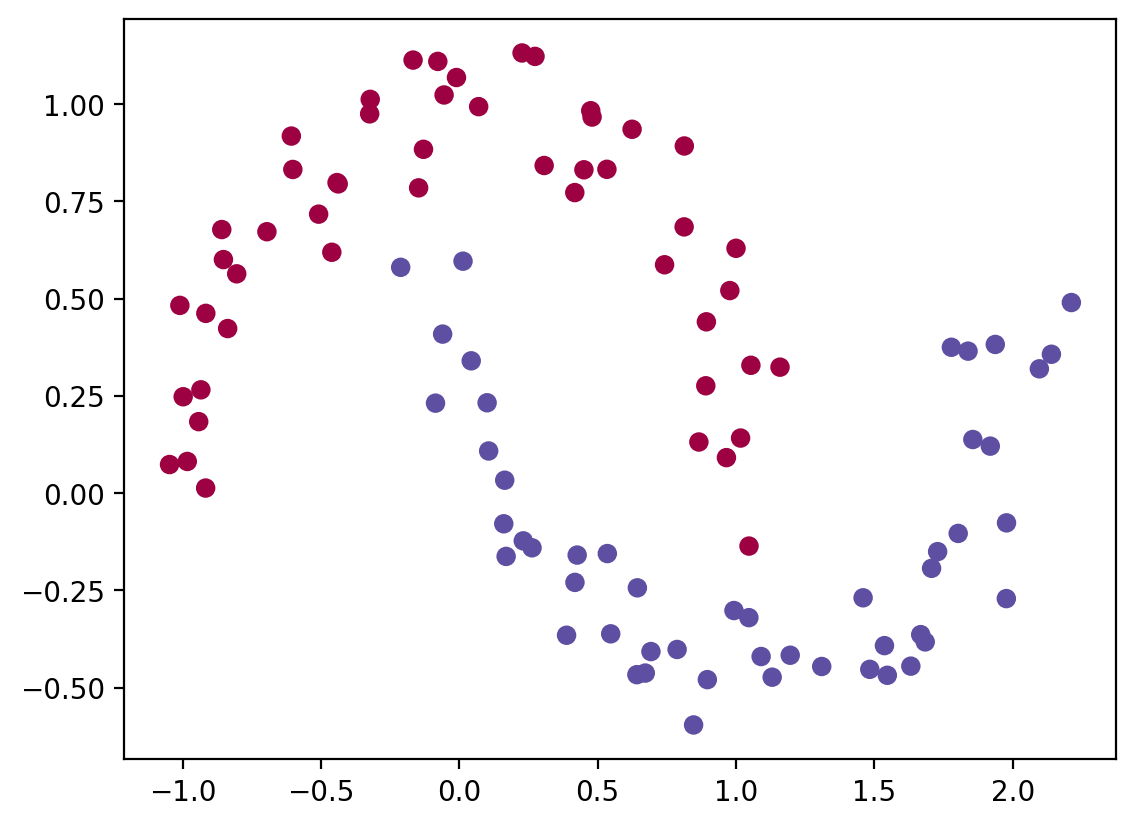

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [6]:
log_reg = LogisticRegression(2)

In [7]:
log_reg.linear.weight, log_reg.linear.bias

(Parameter containing:
 tensor([[ 4.4356e-01, -2.6494e-04]], requires_grad=True),
 Parameter containing:
 tensor([0.3300], requires_grad=True))

In [8]:
log_reg(torch.tensor([1, 0.0]))

tensor([0.7736], grad_fn=<AddBackward0>)

/Users/nipun/mambaforge/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


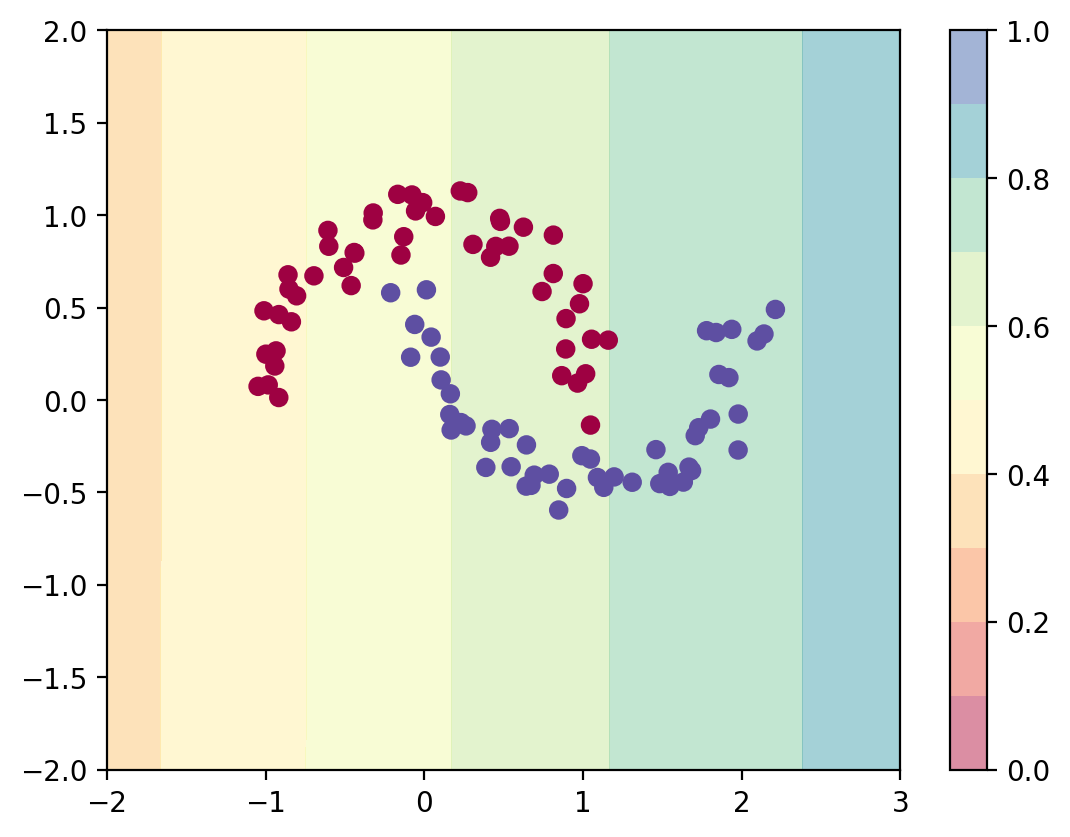

In [9]:
# Predict with the model

def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-2, 3, 100), torch.linspace(-2, 2, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), levels=[0.0, 0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1.0], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
predict_plot_grid(log_reg)
    
    

In [10]:


opt = torch.optim.Adam(log_reg.parameters(), lr=0.01)

converged = False
prev_loss = 1e8 
i = 0
while not converged:
    opt.zero_grad()
    logits = log_reg(torch.tensor(X, dtype=torch.float32))
    loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(y, dtype=torch.float32).view(-1, 1))
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1


0 0.6356857419013977
10 0.594046413898468
20 0.5578780174255371
30 0.5273130536079407
40 0.5019742846488953
50 0.4811658561229706
60 0.46408790349960327
70 0.4499843716621399
80 0.43821147084236145
90 0.4282519817352295
100 0.41970330476760864
110 0.41225600242614746
120 0.4056738317012787
130 0.3997761607170105
140 0.39442503452301025
150 0.38951483368873596
160 0.38496479392051697
170 0.3807127773761749
180 0.3767113983631134
190 0.37292394042015076
200 0.3693225383758545
210 0.36588576436042786
220 0.36259689927101135
230 0.35944312810897827
240 0.3564144968986511
250 0.35350313782691956
260 0.3507026731967926
270 0.3480079174041748
280 0.34541457891464233
290 0.3429188132286072
300 0.3405173122882843
310 0.33820685744285583
320 0.3359847366809845
330 0.3338480293750763
340 0.33179405331611633
350 0.3298201858997345
360 0.3279236853122711
370 0.326102077960968
380 0.3243526518344879
390 0.3226730227470398
400 0.3210606873035431
410 0.3195130228996277
420 0.3180277347564697
430 0.316

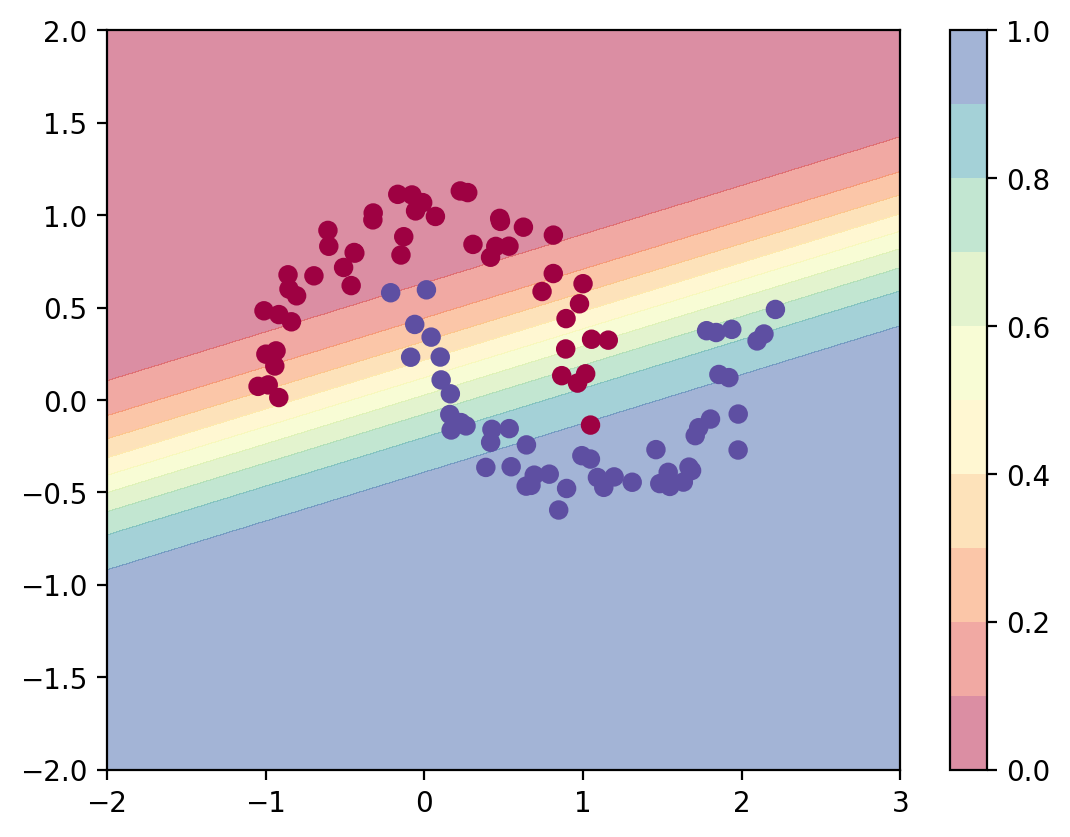

In [11]:
predict_plot_grid(log_reg)

In [12]:
# Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Sepal width')

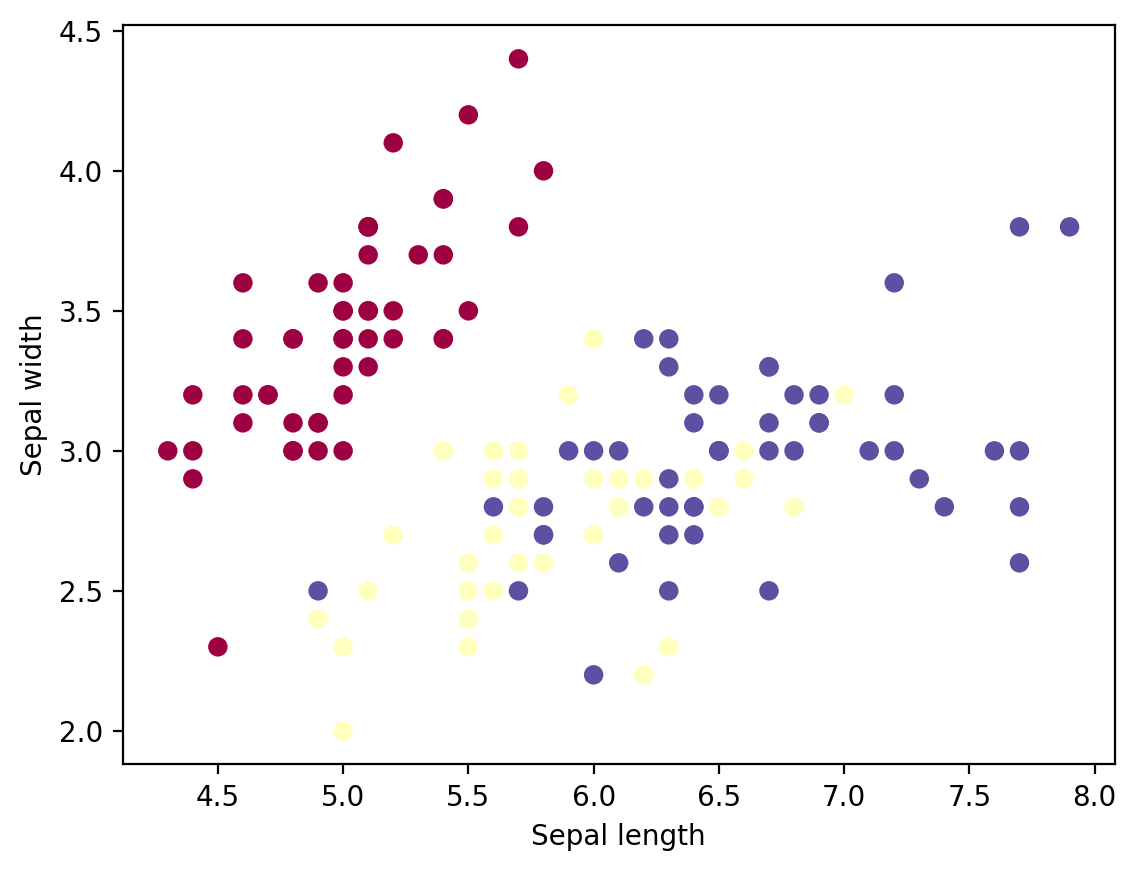

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [20]:
class ThreeClassLogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(ThreeClassLogisticRegression, self).__init__()
        self.linear1 = nn.Linear(input_dim, 1)
        self.linear2 = nn.Linear(input_dim, 1)
        self.linear3 = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        logits1 = self.linear1(x) #x^T theta_1
        logits2 = self.linear2(x) # x^T theta_2
        logits3 = self.linear3(x) # x^T theta_3
        return torch.cat([logits1, logits2, logits3], dim=-1)
    

class MultiClassLogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MultiClassLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits

In [21]:
mlr = ThreeClassLogisticRegression(2)

In [22]:
X_tensor = torch.tensor(X, dtype=torch.float32)[:,:2]
y_tensor = torch.tensor(y, dtype=torch.long)

In [23]:
mlr(X_tensor).shape

torch.Size([150, 3])

In [24]:
mlr_efficient = MultiClassLogisticRegression(2, 3)
mlr_efficient(X_tensor).shape

torch.Size([150, 3])

In [25]:
mlr_efficient(X_tensor[:5])

tensor([[-1.0483, -4.8033,  1.9511],
        [-1.0942, -4.4552,  1.9622],
        [-0.9808, -4.4023,  1.8450],
        [-0.9696, -4.2915,  1.8230],
        [-0.9916, -4.7768,  1.8925]], grad_fn=<AddmmBackward0>)

In [26]:
nn.Softmax(dim=-1)(mlr_efficient(X_tensor[:5]))

tensor([[0.0474, 0.0011, 0.9515],
        [0.0449, 0.0016, 0.9536],
        [0.0558, 0.0018, 0.9423],
        [0.0576, 0.0021, 0.9403],
        [0.0529, 0.0012, 0.9459]], grad_fn=<SoftmaxBackward0>)

In [19]:

nn.Softmax(dim=-1)(mlr_efficient(X_tensor[:5])).sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

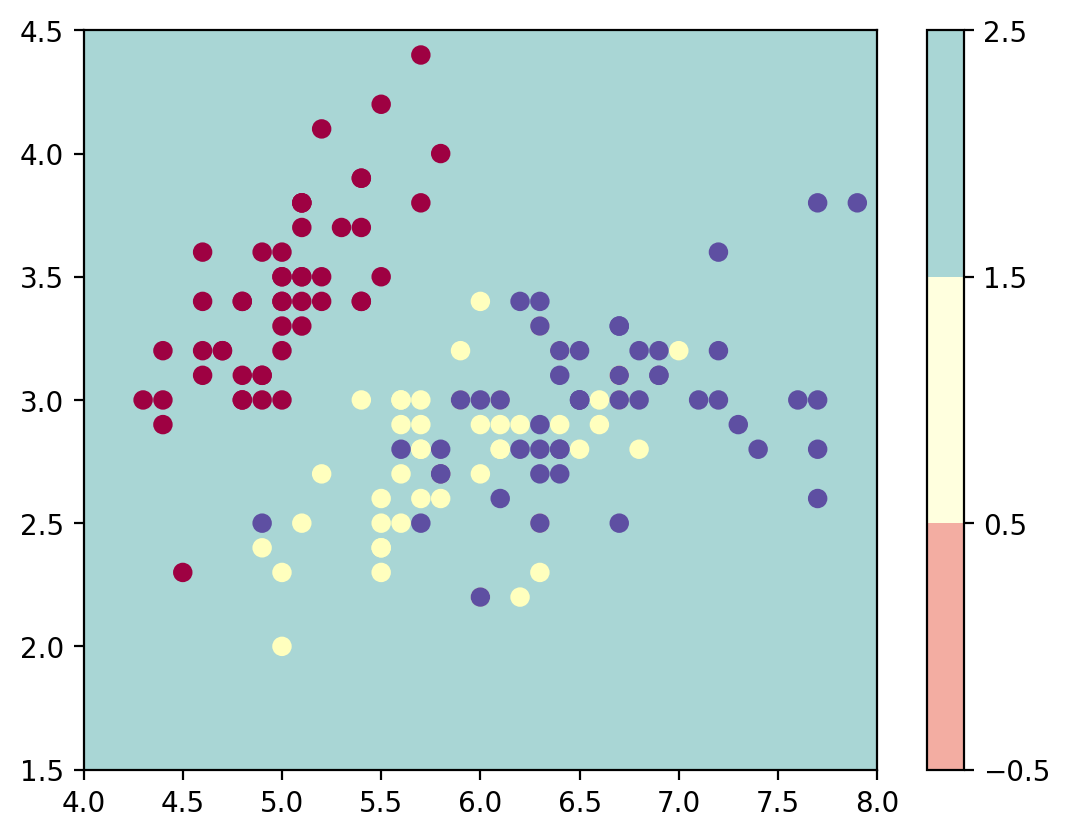

In [27]:
def plot_most_probable_class(model):
    XX, YY = torch.meshgrid(torch.linspace(4, 8, 100), torch.linspace(1.5, 4.5, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    predicted_class = torch.argmax(logits, dim=-1)
    plt.contourf(XX, YY, predicted_class.reshape(100, 100).detach().numpy(), levels=[-0.5, 0.5, 1.5, 2.5], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
plot_most_probable_class(mlr_efficient)

In [21]:
logits = mlr_efficient(X_tensor)
nn.Softmax(dim=-1)(logits[:5])

tensor([[0.0746, 0.8907, 0.0347],
        [0.0938, 0.8669, 0.0393],
        [0.0919, 0.8643, 0.0438],
        [0.0976, 0.8560, 0.0464],
        [0.0739, 0.8895, 0.0366]], grad_fn=<SoftmaxBackward0>)

In [28]:
y_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [29]:
opt = torch.optim.Adam(mlr_efficient.parameters(), lr=0.01)

converged = False
prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = mlr_efficient(X_tensor)
    loss = F.cross_entropy(logits, y_tensor)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1

0 3.512922763824463
10 2.396028518676758
20 1.7443147897720337
30 1.3343197107315063
40 1.0142916440963745
50 0.9684472680091858
60 0.9662931561470032
70 0.9421321749687195
80 0.932521641254425
90 0.9219393134117126
100 0.9116792678833008
110 0.9015797972679138
120 0.8915135860443115
130 0.8814629912376404
140 0.8714943528175354
150 0.8616196513175964
160 0.8518762588500977
170 0.84228515625
180 0.8328675031661987
190 0.8236393928527832
200 0.8146136999130249
210 0.8057998418807983
220 0.7972047328948975
230 0.7888327836990356
240 0.7806861400604248
250 0.7727659344673157
260 0.7650708556175232
270 0.7575994729995728
280 0.7503483891487122
290 0.7433139681816101
300 0.7364917397499084
310 0.7298766374588013
320 0.7234635949134827
330 0.7172466516494751
340 0.7112202048301697
350 0.7053780555725098
360 0.6997144222259521
370 0.6942230463027954
380 0.6888980865478516
390 0.6837335228919983
400 0.6787236928939819
410 0.673862636089325
420 0.6691449284553528
430 0.6645650863647461
440 0.66

In [30]:
mlr_efficient(X_tensor[:5])

tensor([[ 3.5738, -1.9346, -3.4869],
        [ 1.4138, -0.7382, -2.8186],
        [ 3.6912, -1.3615, -3.6789],
        [ 3.5621, -1.1532, -3.6723],
        [ 4.7125, -2.2463, -3.9170]], grad_fn=<AddmmBackward0>)

In [33]:
pred = F.softmax(mlr_efficient(X_tensor), dim=-1).detach().numpy()
pd.DataFrame(pred)

,0,1,2
0,0.995113,0.004033,0.000854
1,0.884354,0.102808,0.012838
2,0.993027,0.006347,0.000625
3,0.990414,0.008871,0.000714
4,0.998872,0.000949,0.000179
...,...,...,...
145,0.000119,0.309663,0.690218
146,0.000021,0.511706,0.488273
147,0.000446,0.381773,0.617781
148,0.092207,0.416003,0.491790


In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame(pred, columns=iris.target_names)
df["GT"] = iris.target
df

,setosa,versicolor,virginica,GT
0,0.995113,0.004033,0.000854,0
1,0.884354,0.102808,0.012838,0
2,0.993027,0.006347,0.000625,0
3,0.990414,0.008871,0.000714,0
4,0.998872,0.000949,0.000179,0
...,...,...,...,...
145,0.000119,0.309663,0.690218,2
146,0.000021,0.511706,0.488273,2
147,0.000446,0.381773,0.617781,2
148,0.092207,0.416003,0.491790,2


In [36]:
# Find prediction
y_pred = pred.argmax(axis=-1)

df["Predicted Class"] = y_pred


In [37]:
df

,setosa,versicolor,virginica,GT,Predicted Class
0,0.995113,0.004033,0.000854,0,0
1,0.884354,0.102808,0.012838,0,0
2,0.993027,0.006347,0.000625,0,0
3,0.990414,0.008871,0.000714,0,0
4,0.998872,0.000949,0.000179,0,0
...,...,...,...,...,...
145,0.000119,0.309663,0.690218,2,2
146,0.000021,0.511706,0.488273,2,1
147,0.000446,0.381773,0.617781,2,2
148,0.092207,0.416003,0.491790,2,2


In [38]:
# Accuracy
(y_pred == iris.target).mean()

0.8266666666666667

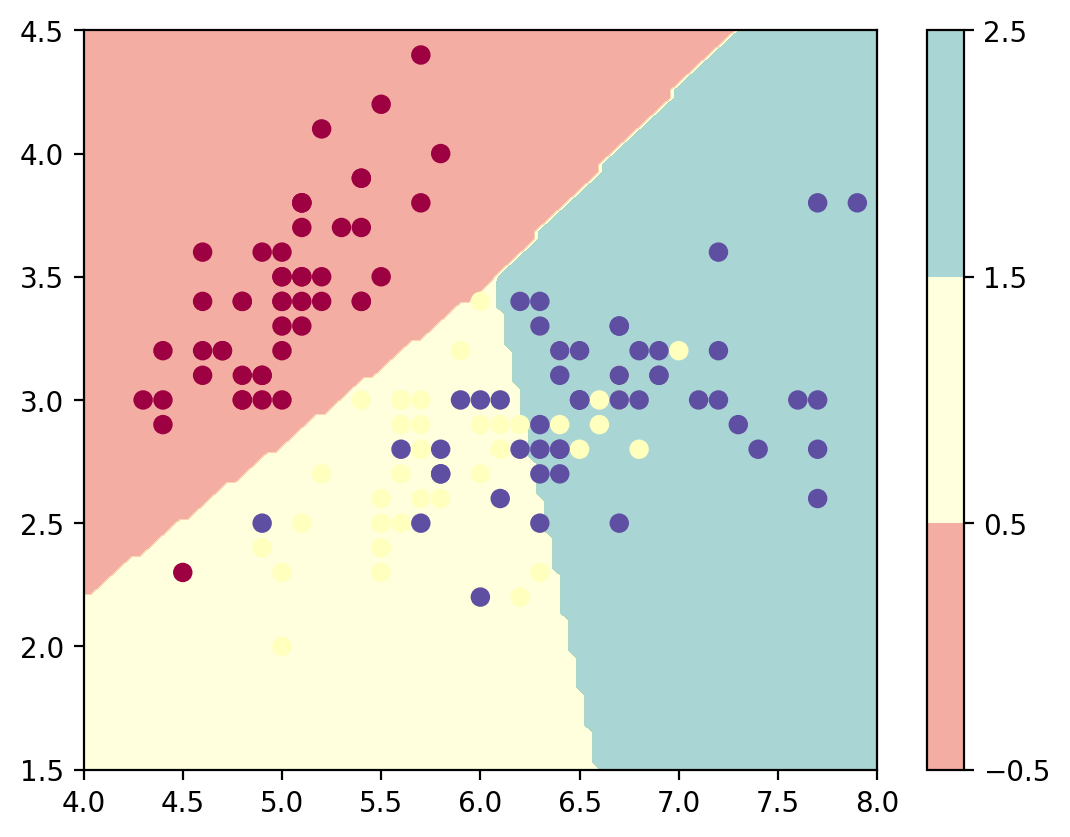

In [39]:
plot_most_probable_class(mlr_efficient)

In [40]:
# Add more features like x^2, xy, y^2

X = iris.data
y = iris.target

X = np.concatenate([X, X**2, X[:, [0]]*X[:, [1]], X[:, [1]]**2], axis=-1)

X_tensor = torch.tensor(X, dtype=torch.float32)

mlr_efficient = MultiClassLogisticRegression(10, 3)


opt = torch.optim.Adam(mlr_efficient.parameters(), lr=0.01)

converged = False

prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = mlr_efficient(X_tensor)
    loss = F.cross_entropy(logits, y_tensor)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1
    


0 14.176704406738281
10 3.6011011600494385
20 2.2202305793762207
30 1.1102030277252197
40 0.7572755217552185
50 0.5920207500457764
60 0.4846627414226532
70 0.42518150806427
80 0.3840698003768921
90 0.3463784456253052
100 0.3159296214580536
110 0.29051730036735535
120 0.26877450942993164
130 0.25018322467803955
140 0.23417198657989502
150 0.22026310861110687
160 0.208110511302948
170 0.19741976261138916
180 0.1879548579454422
190 0.17952509224414825
200 0.1719748079776764
210 0.16517652571201324
220 0.1590253710746765
230 0.15343450009822845
240 0.1483314335346222
250 0.14365535974502563
260 0.1393551379442215
270 0.13538718223571777
280 0.1317143738269806
290 0.1283048838376999
300 0.12513123452663422
310 0.12216956913471222
320 0.11939921230077744
330 0.11680207401514053
340 0.11436217278242111
350 0.11206554621458054
360 0.10989975929260254
370 0.10785383731126785
380 0.10591793060302734
390 0.10408329963684082
400 0.10234205424785614
410 0.100687175989151
420 0.09911229461431503
430

In [41]:
# Accuracy
pred = F.softmax(mlr_efficient(X_tensor), dim=-1).detach().numpy()
y_pred = pred.argmax(axis=-1)
(y_pred == iris.target).mean()

0.9866666666666667